# 다항 선형 회귀

- 다중 선형 회귀 : 일차 방정식
- 다항 선형 회귀 : 2차, 3차 방정식

- 단순 선형 회귀 직선형으로 표현한 것보다 다항 회귀 곡선형으로 표현한 것이 더 예측 성능이 높음

- 회귀에서 선형 회귀/비선형 회귀 나누는 기준은 회귀 계수가 선형/비선형인지에 따른 것이지 독립변수의 선형/비선형 여부와는 무관

- 사이킬런에서는 일반적으로 Pipeline 클래스를 이용하여 PolynomialFeatures 변환과 LinearRegression 학습/예측을 결합하여 다항 회귀를 구현

In [1]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

X = np.arange(4).reshape(2, 2)
print('일차 단항식 계수 feature : \n', X)

일차 단항식 계수 feature : 
 [[0 1]
 [2 3]]


In [2]:
# degree = 2인 2차 다항식으로 변환하기 위해 PoltnomialFeatures를 이용하여 변환
poly = PolynomialFeatures(degree = 2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 feature:\n', poly_ftr)

변환된 2차 다항식 계수 feature:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [3]:
def polynomial_func(X):
    y = 1 + 2*X + X**2 + X**3
    return y

X = np.arange(4).reshape(2, 2)
print('일차 단항식 계수 feature: \n', X)
y = polynomial_func(X)
print('삼차 다항식 결정값 :\n', y)

일차 단항식 계수 feature: 
 [[0 1]
 [2 3]]
삼차 다항식 결정값 :
 [[ 1  5]
 [17 43]]


In [4]:
from sklearn.linear_model import LinearRegression
# 3차 다항식 변환
poly_ftr = PolynomialFeatures(degree = 3).fit_transform(X)
print('3차 다항식 계수 feature: \n', poly_ftr)

# Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr, y)
print('Polynomial 회귀 계수\n', np.round(model.coef_, 2))
print('Poltnomial 회귀 shape :', model.coef_.shape)

3차 다항식 계수 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [[0.   0.02 0.02 0.05 0.07 0.1  0.1  0.14 0.22 0.31]
 [0.   0.06 0.06 0.11 0.17 0.23 0.23 0.34 0.51 0.74]]
Poltnomial 회귀 shape : (2, 10)


In [5]:
# 파이프라인을 이용한 3차 다항 회귀 실습
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
    y = 1 + 2*X + X**2 + X**3
    return y

# Pipeline 객체로 Streamline 하게 Polynomial Feature 변환과 Linear Regression을 연결
model = Pipeline([('poly', PolynomialFeatures(degree = 3)),
                  ('linear', LinearRegression())])

X = np.arange(4).reshape(2, 2)
y = polynomial_func(X)

model = model.fit(X, y)
print('Polynomial 회귀 계수 \n', np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수 
 [[0.   0.02 0.02 0.05 0.07 0.1  0.1  0.14 0.22 0.31]
 [0.   0.06 0.06 0.11 0.17 0.23 0.23 0.34 0.51 0.74]]


## 다항회귀 이용해서 보스턴 주택가격 예측

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd

# boston 데이터셋 로드
# boston 데이터셋 로드
bostonDF = pd.read_csv('../datasets/Boston.csv', index_col=0)

print(bostonDF.shape)
bostonDF.head()

(506, 14)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [7]:
y_target = bostonDF['medv']
X_data = bostonDF.drop(['medv'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size = 0.3, random_state = 156)

In [8]:
# Pipeline 객체로 Streamline 하게 Polynomial Feature 변환과 Linear Regression을 연결
p_model = Pipeline([('poly', PolynomialFeatures(degree = 2, include_bias = False)), 
                    ('linear', LinearRegression())])

p_model

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('linear', LinearRegression())])

In [11]:
p_model.fit(X_train, y_train)
y_preds = p_model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 15.556, RMSE : 3.944
Variance score : 0.782


In [12]:
# 다항 회귀에서 degree 수를 높일수록 오버피팅이 될 수 있다는 점 주의

# Pipeline 객체로 Streamline 하게 Polynomial Feature 변환과 Linear Regression을 연결
p_model = Pipeline([('poly', PolynomialFeatures(degree = 3, include_bias = False)), 
                    ('linear', LinearRegression())])

p_model

Pipeline(steps=[('poly', PolynomialFeatures(degree=3, include_bias=False)),
                ('linear', LinearRegression())])

In [13]:
p_model.fit(X_train, y_train)
y_preds = p_model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 79625.594, RMSE : 282.180
Variance score : -1116.598


In [14]:
# degree = 2로 변환된 다항 회귀의 피처들을 살펴보면, 기존의 피처 13개를 조합해서 피처가 104개로 늘어난 것을 확인할 수 있다.
# 다항식에서 degree가 높아지면 오버피팇이 일어날 수 있다.
X_train_poly = PolynomialFeatures(degree = 2, include_bias = False).fit_transform(X_train, y_train)
print(X_train_poly.shape, X_train.shape)

(354, 104) (354, 13)


## 다항 회귀 차수 변화시키면서 회귀 계수와 MSE값 구하고 추세선 그리기

In [17]:
# noise값이 추가된 코사인 시뮬레이션 점 찍기
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

# random 값으로 구성된 X값에 대해 Cosine 변환값을 반환
def true_fun(X):
    return np.cos(1.5 * np.pi*X)

# X는 0부터 1까지 30개의 random 값을 순서대로 sampling 한 데이터
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y값은 cosine 기반의 true_fun()에서 약간의 Noise 변동값을 더한 값
y = true_fun(X) + np.random.randn(n_samples) * 0.1
y

array([ 1.0819082 ,  0.87027612,  1.14386208,  0.70322051,  0.78494746,
       -0.25265944, -0.22066063, -0.26595867, -0.4562644 , -0.53001927,
       -0.86481449, -0.99462675, -0.87458603, -0.83407054, -0.77090649,
       -0.83476183, -1.03080067, -1.02544303, -1.0788268 , -1.00713288,
       -1.03009698, -0.63623922, -0.86230652, -0.75328767, -0.70023795,
       -0.41043495, -0.50486767, -0.27907117, -0.25994628, -0.06189804])

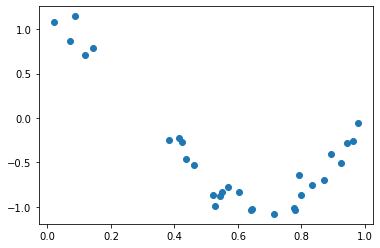

In [18]:
plt.scatter(X, y)


Degree 1 회귀 계수는 [-2.] 입니다.
Degree 1 MSE는 0.41입니다. 

Degree 4 회귀 계수는 [  0. -18.  24.  -7.] 입니다.
Degree 4 MSE는 0.04입니다. 

Degree 15 회귀 계수는 [-2.98300000e+03  1.03899000e+05 -1.87415500e+06  2.03715630e+07
 -1.44872943e+08  7.09314063e+08 -2.47065458e+09  6.24560486e+09
 -1.15676454e+10  1.56894918e+10 -1.54006060e+10  1.06457324e+10
 -4.91377955e+09  1.35919802e+09 -1.70381028e+08] 입니다.
Degree 15 MSE는 180184535.54입니다. 


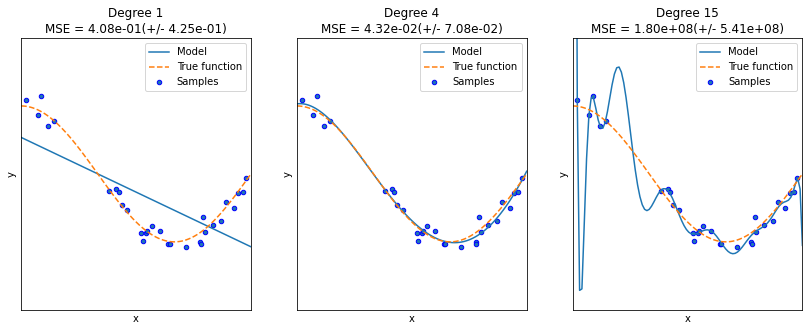

In [25]:
# 다항 회귀 차수를 변화시키면서 회귀 계수와 MSE값 구해보고 그래프로 나타내기
from sklearn.pipeline import Pipeline

plt.figure(figsize = (14, 5))
degrees = [1, 4, 15]

# 다항 회귀의 차수를 1, 4, 15로 각각 변화시키면서 비교
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks = (), yticks = ())

    # 개별 degree 별로 Polynomial 변환
    polynomial_features = PolynomialFeatures(degree = degrees[i], include_bias = False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([
        ('polynomial_features', polynomial_features),
        ('linear_regression', linear_regression)
    ])
    pipeline.fit(X.reshape(-1, 1), y)

    # 교차 검증으로 다항 회귀 평가
    scores = cross_val_score(pipeline, X.reshape(-1, 1), y, scoring = 'neg_mean_squared_error', cv = 10)
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients), 2))
    print('Degree {0} MSE는 {1:.2f}입니다. '.format(degrees[i], -1*np.mean(scores)))

    # 0부터 1까지 테스터 데이터 세트를 100개로 나눠 예측을 수행
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교
    X_test = np.linspace(0, 1, 100)
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label = 'Model')
    # 실제값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label = 'True function')
    plt.scatter(X, y, edgecolors = 'b', s = 20, label = 'Samples')

    plt.xlabel('x'); plt.ylabel('y'); plt.xlim((0, 1)); plt.ylim((-2, 2)); plt.legend(loc = 'best')
    plt.title('Degree {}\nMSE = {:.2e}(+/- {:.2e})'.format(degrees[i], -scores.mean(), scores.std()))

plt.show()

- 첫 번째 그래프는 변동성 낮고 편향 높음
- 두 번째 그래프는 변동성 적당, 편향 적당
- 세 번째 그래프는 변동성 높고 편향 낮음

- 편향 높으면 분산 낮아지는 현상 => 과소적합
- 분산 높으면 편향 낮아지는 현상 => 과대적합